In [14]:
import numpy as np
import matplotlib.pyplot as plt

np.set_printoptions(precision=4)

In [15]:
class CloseNetwork:
    
    def __init__(self, L, N, mu, Theta):
        self.L = L
        self.N = N
        self.mu = mu
        self.Theta = Theta
        
        # Массивы для хранения характеристик (для граифков)
        self.list_s = []
        self.list_u = []
        self.list_lambdas = []
        self.list_mu = []
        
    def make_calculations(self, mu, system_number):
        omega = np.array([1 / self.L for _ in range(self.L)])
        for _ in range(1000000):
            omega = omega.dot(self.Theta)
            
        # М.о. числа требований в системах
        s = [[0] * self.L for _ in range(self.N + 1)]
        # М.о. длительности пребывания требований в системах
        u = [[0] * self.L for _ in range(self.N + 1)]
        # М.о. длительности ожидания требований в очереди системы
        w = [0] * self.L
        # М.о. числа требований, ожидающих обслуживание в очереди системы
        b = [0] * self.L
        # М.о. числа занятых приборов в системах
        h = [0] * self.L
        # Интенсивность входящего потока требований в системы
        lambdas = [0] * self.L
        
        # Вычисляем s и u по формулам для рекурсивного метода анализа сетей (глава 2.2) 
        for Y in range(1, self.N + 1):
            for i in range(self.L):
                u[Y][i] = 1 / mu[i] * (s[Y-1][i] + 1)
            for i in range(L):
                summa = 0
                for j in range(L):
                    summa += omega[j] * u[Y][j]
                s[Y][i] = omega[i] * u[Y][i] * Y / summa
        
        # С помощью s и u вычисляем характеристики сети
        for i in range(L):
            w[i] = u[self.N][i] - (1 / mu[i])
            b[i] = s[self.N][i] * w[i] / u[self.N][i]
            h[i] = s[self.N][i] - b[i]
            lambdas[i] = h[i] * mu[i]
            
        # Заносим значения под запись 
        self.list_s.append(s[self.N])
        self.list_u.append(u[self.N])
        self.list_lambdas.append(lambdas)
        self.list_mu.append(mu[system_number - 1])
        
    def create_graphics(self, system_number, color):
        print(f'График зависимости s от mu_{system_number}:')
        for i in range(len(self.list_s[0])):
            print(f'Система {i + 1}:')
            plt.plot(self.list_mu, [s[i] for s in self.list_s], color)
            plt.xlabel(f'mu {system_number}')
            plt.ylabel('s')
            plt.grid()
            plt.show()
        print('*' * 120)

        print(f'График зависимости u от mu_{system_number}:')
        for i in range(len(self.list_u[0])):
            print(f'Система {i + 1}:')
            plt.plot(self.list_mu, [u[i] for u in self.list_u], color)
            plt.xlabel(f'mu {system_number}')
            plt.ylabel('u')
            plt.grid()
            plt.show()
        print('*' * 120)
        
        print(f'График зависимости lambdas от mu_{system_number}:')
        for i in range(len(self.list_lambdas[0])):
            print(f'Система {i + 1}:')
            plt.plot(self.list_mu, [l[i] for l in self.list_lambdas], color)
            plt.xlabel(f'mu {system_number}')
            plt.ylabel(f'lambda_{i + 1}')
            plt.grid()
            plt.show()
        print('*' * 120)

In [16]:
L = 7
N = 14
mu = [1, 1.5, 1.3, 1.7, 1.9, 1.4, 2]
Theta = np.array([
    [0, 0.3, 0, 0.7, 0, 0, 0],
    [0, 0, 0.6, 0, 0, 0.4, 0],
    [0.5, 0, 0, 0.5, 0, 0, 0],
    [0, 0, 0, 0, 1, 0, 0],
    [0, 0, 0.3, 0, 0, 0.7, 0],
    [0, 0, 0, 0, 0, 0, 1],
    [0.8, 0, 0, 0, 0.2, 0, 0],
])


diapason = np.arange(0.1, 4, 0.1)

График зависимости s от mu_2:
Система 1:


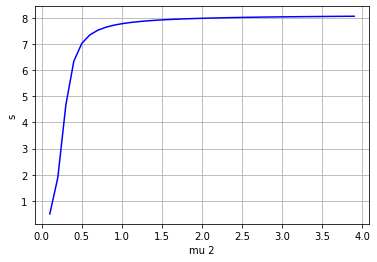

Система 2:


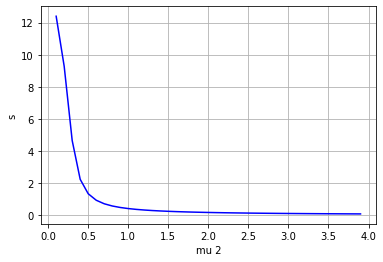

Система 3:


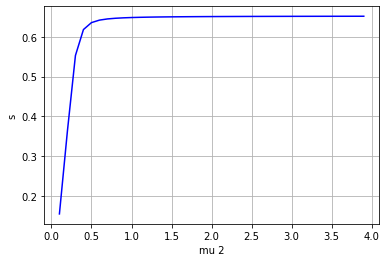

Система 4:


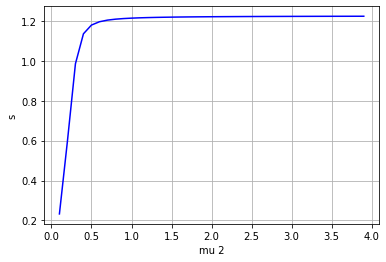

Система 5:


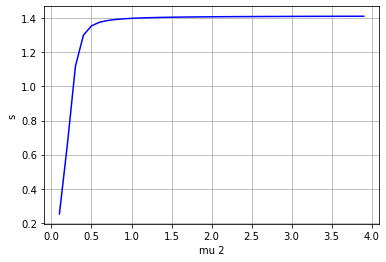

Система 6:


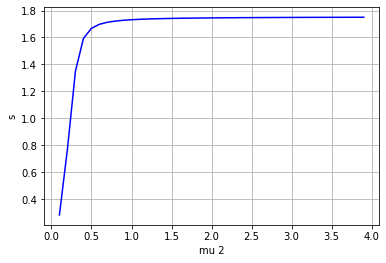

Система 7:


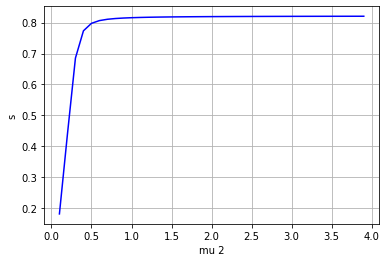

************************************************************************************************************************
График зависимости u от mu_2:
Система 1:


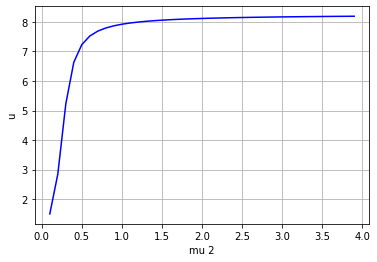

Система 2:


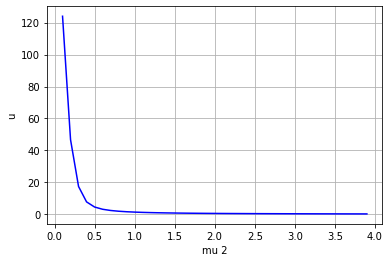

Система 3:


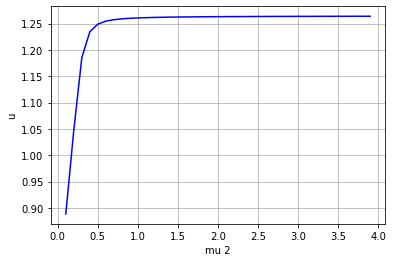

Система 4:


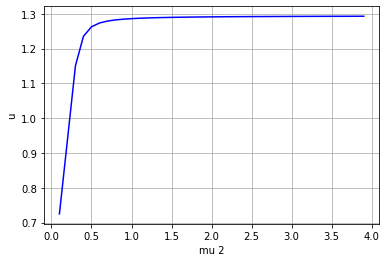

Система 5:


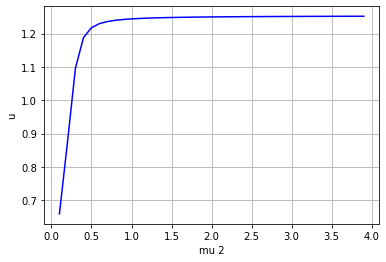

Система 6:


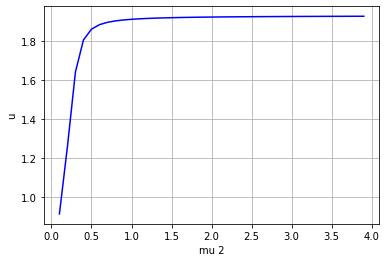

Система 7:


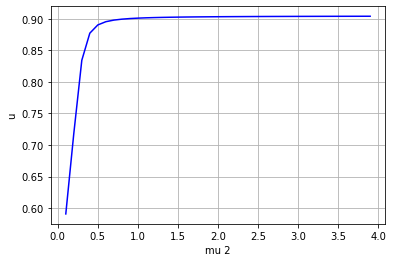

************************************************************************************************************************
График зависимости lambdas от mu_2:
Система 1:


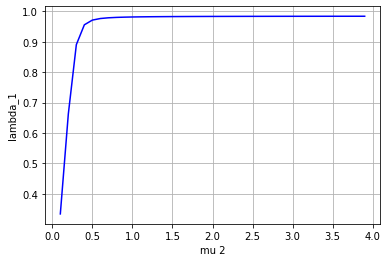

Система 2:


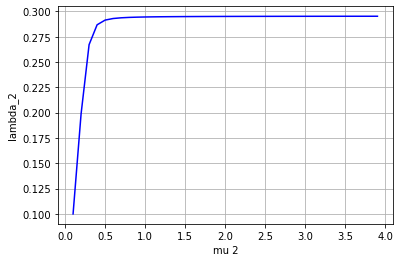

Система 3:


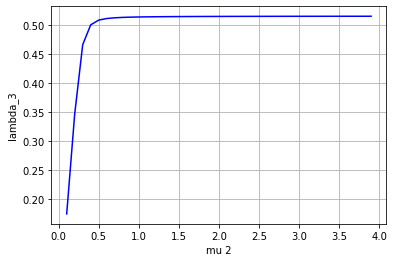

Система 4:


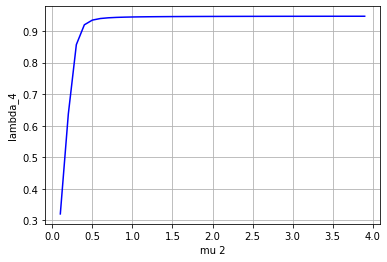

Система 5:


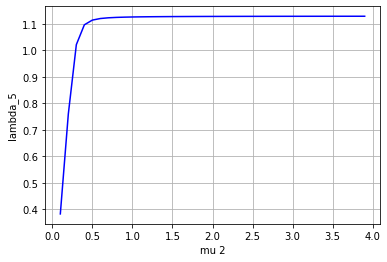

Система 6:


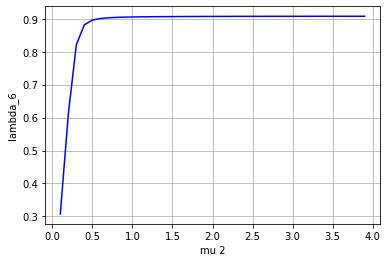

Система 7:


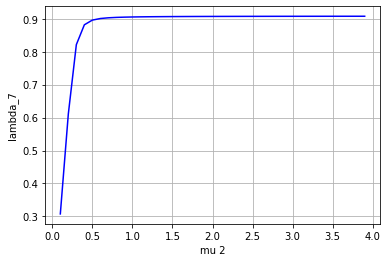

************************************************************************************************************************


In [17]:
# 1. Меняем mu 2 
network = CloseNetwork(L, N, mu, Theta)
system_number = 2
for i in diapason:
    mu[system_number-1] = i
    network.make_calculations(mu, system_number)
network.create_graphics(system_number, 'b')

In [18]:
# Возвращаем начальное значение mu
mu = [1, 1.5, 1.3, 1.7, 1.9, 1.4, 2]

График зависимости s от mu_4:
Система 1:


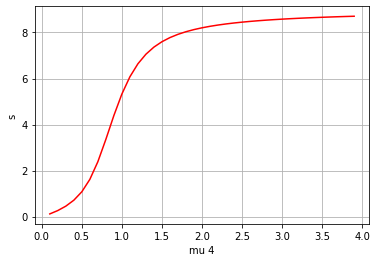

Система 2:


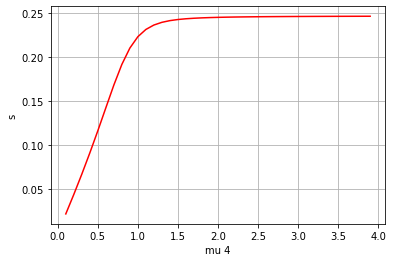

Система 3:


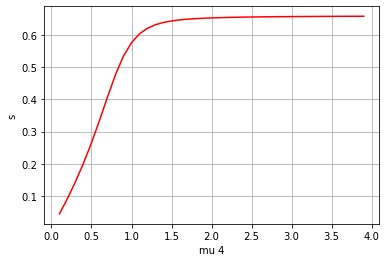

Система 4:


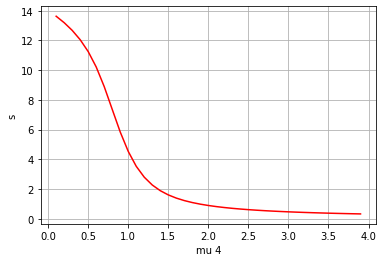

Система 5:


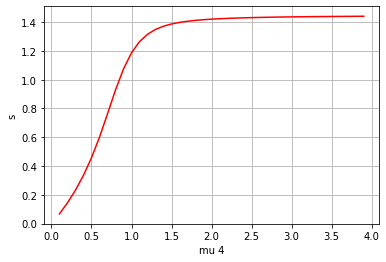

Система 6:


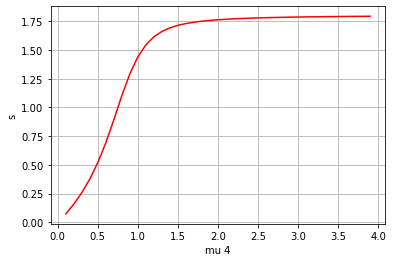

Система 7:


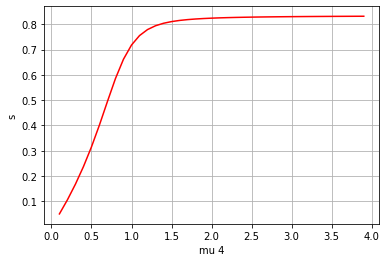

************************************************************************************************************************
График зависимости u от mu_4:
Система 1:


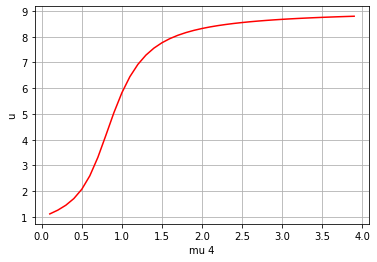

Система 2:


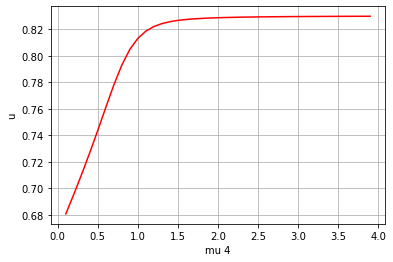

Система 3:


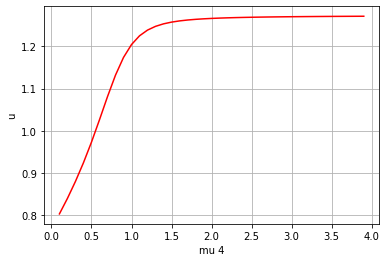

Система 4:


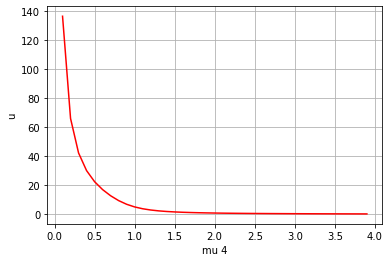

Система 5:


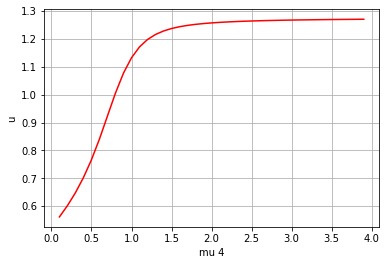

Система 6:


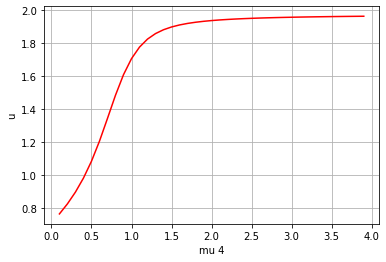

Система 7:


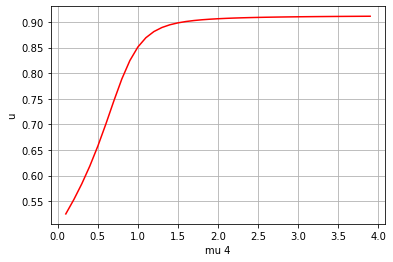

************************************************************************************************************************
График зависимости lambdas от mu_4:
Система 1:


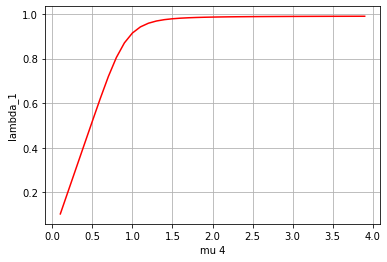

Система 2:


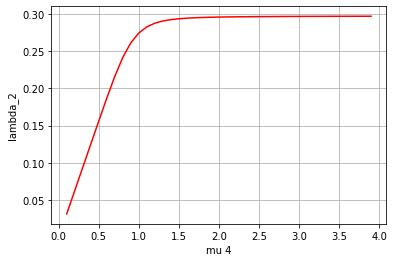

Система 3:


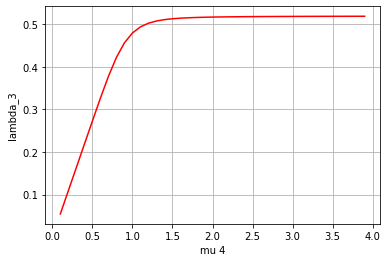

Система 4:


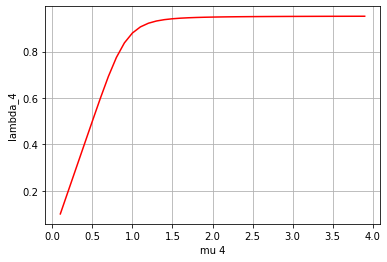

Система 5:


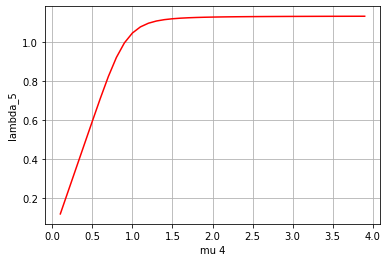

Система 6:


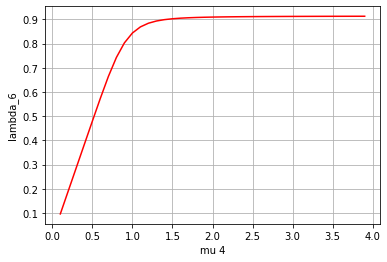

Система 7:


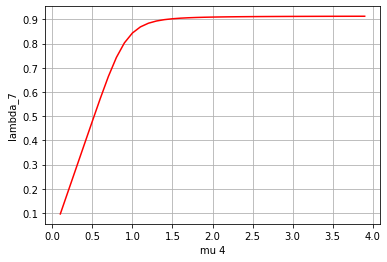

************************************************************************************************************************


In [20]:
# 2. Меняем mu 4 
network = CloseNetwork(L, N, mu, Theta)
system_number = 4
for i in diapason:
    mu[system_number-1] = i
    network.make_calculations(mu, system_number)
network.create_graphics(system_number, 'r')